In [22]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [23]:
activate_profiling = False
df_train = pd.read_csv("../data/data_train.csv")
df_test = pd.read_csv("../data/data_test.csv")
target = 'income'

In [24]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [25]:
if activate_profiling:
    profile = ProfileReport(df_train, title="Pandas Profiling Report")
    profile.to_file("../reports/train.html")
    profile = ProfileReport(df_test, title="Pandas Profiling Report")
    profile.to_file("../reports/test.html")

In [26]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

In [27]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rf_clf.score(X_test, y_test)

0.8543701246852159

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1_score(y_test, rf_clf.predict(X_test), zero_division=1)

0.6626831697254233

In [31]:
probs = rf_clf.predict_proba(X_test)

In [32]:
probs = probs[:, 1]

In [33]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.90


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

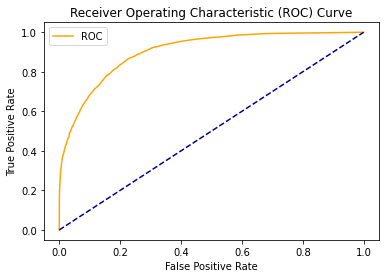

In [36]:
plot_roc_curve(fpr, tpr)